# Imports

In [1]:
import string

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB, ComplementNB # complement naive bias is better for unblanced data

## data

In [5]:
data_df = pd.read_csv('../data/Combined Data.csv', index_col=0)
data_df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


# Data cleaning

## check for null values

In [6]:
#not important
print("Missing values per column:")
print(data_df.isna().sum())

Missing values per column:
statement    362
status         0
dtype: int64


## drop null values

In [7]:
data_df = data_df.dropna(axis=0).reset_index(drop=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52681 entries, 0 to 52680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 823.3+ KB


## check for duplicates

In [8]:
#not important
data_df.duplicated().sum()

1588

## remove duplicaes

In [9]:
data_df = data_df.drop_duplicates().reset_index(drop=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51093 entries, 0 to 51092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  51093 non-null  object
 1   status     51093 non-null  object
dtypes: object(2)
memory usage: 798.5+ KB


# EDA


Unique labels: ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']

Label distribution:
status
Normal                  0.313937
Depression              0.295422
Suicidal                0.208326
Anxiety                 0.070910
Bipolar                 0.048950
Stress                  0.044938
Personality disorder    0.017517
Name: proportion, dtype: float64


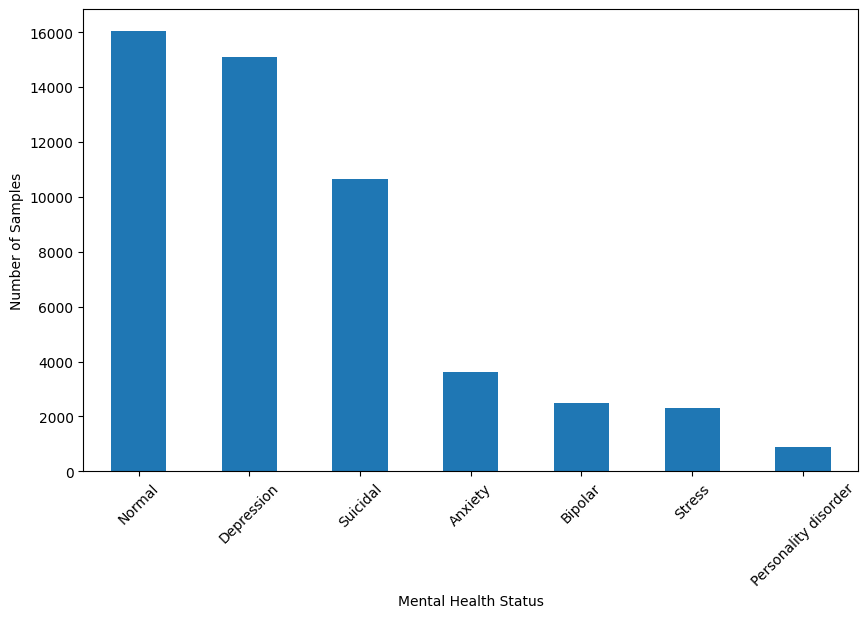

In [10]:
#not important
print(f"\nUnique labels: {data_df['status'].unique()}")
print(f"\nLabel distribution:")
print(data_df['status'].value_counts(normalize=True))

# Visualization
plt.figure(figsize=(10, 6))
data_df['status'].value_counts().plot(kind='bar')
plt.xlabel('Mental Health Status')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Data preprocessing

In [11]:
def preprocessing(sentence):
    # Removing whitespaces
    sentence = sentence.strip()

    # Lowercasing
    sentence = sentence.lower()

    # Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    # Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')

    # Tokenizing
    tokenized = word_tokenize(sentence)

    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_sentence = " ".join(lemmatized)
    return cleaned_sentence

In [12]:
data_df['clean_statement'] = data_df['statement'].apply(preprocessing)
data_df.head()

,statement,status,clean_statement
0,oh my gosh,Anxiety,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless it been a month now b...


# Modelling

## test train

In [23]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    data_df["clean_statement"], data_df["status"], test_size=test_size, stratify=data_df["status"], random_state=42
)

In [14]:
#test if stratification worked
print('Labeles in whole data -')
print(round(data_df.status.value_counts(normalize=bool),2))
print()
print('Labeles in train data -')
print(round(y_train.value_counts(normalize=bool),2))
print()
print('Labeles in test data -')
print(round(y_train.value_counts(normalize=bool),2))

Labeles in whole data -
status
Normal                  0.31
Depression              0.30
Suicidal                0.21
Anxiety                 0.07
Bipolar                 0.05
Stress                  0.04
Personality disorder    0.02
Name: proportion, dtype: float64

Labeles in train data -
status
Normal                  0.31
Depression              0.30
Suicidal                0.21
Anxiety                 0.07
Bipolar                 0.05
Stress                  0.04
Personality disorder    0.02
Name: proportion, dtype: float64

Labeles in test data -
status
Normal                  0.31
Depression              0.30
Suicidal                0.21
Anxiety                 0.07
Bipolar                 0.05
Stress                  0.04
Personality disorder    0.02
Name: proportion, dtype: float64


## vectorizing

In [51]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2),stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## scaling (may be not needed)

In [52]:
scaler_obj = StandardScaler(with_mean=False)
X_train_tfidf_scaled = scaler_obj.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler_obj.transform(X_test_tfidf)

## model 1 SVM

scaling the x values gave better performance <br>
tried with kernel 'rbf'... worse result <br>
polynom kernel did not help <br>
going from iteration =500 to iteration = 1000 did not have much improvement <br>

In [ ]:
svm_clf = SVC(kernel='linear',class_weight='balanced',max_iter=1000)
# svm_clf.fit(X_train_tfidf, y_train)
svm_clf.fit(X_train_tfidf_scaled, y_train)
#testing
y_pred = svm_clf.predict(X_test_tfidf_scaled)
print(classification_report(y_test, y_pred))

/home/sanju/.pyenv/versions/3.10.6/envs/venv_stress_sense1/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                      precision    recall  f1-score   support

             Anxiety       0.55      0.70      0.62       725
             Bipolar       0.53      0.66      0.59       500
          Depression       0.54      0.60      0.56      3019
              Normal       0.77      0.48      0.59      3208
Personality disorder       0.43      0.33      0.37       179
              Stress       0.18      0.29      0.22       459
            Suicidal       0.37      0.42      0.39      2129

            accuracy                           0.52     10219
           macro avg       0.48      0.50      0.48     10219
        weighted avg       0.56      0.52      0.52     10219



## Decision tree

In [54]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_tfidf, y_train)

#testing
y_pred = dt_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.56      0.53      0.54       725
             Bipolar       0.53      0.48      0.50       500
          Depression       0.58      0.57      0.57      3019
              Normal       0.83      0.88      0.85      3208
Personality disorder       0.36      0.28      0.32       179
              Stress       0.36      0.31      0.33       459
            Suicidal       0.52      0.53      0.53      2129

            accuracy                           0.63     10219
           macro avg       0.53      0.51      0.52     10219
        weighted avg       0.63      0.63      0.63     10219



## Random forest

using scaled or unscaled x values does not make a lot of difference<br>

In [40]:
RF_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20)
RF_clf.fit(X_train_tfidf_scaled, y_train)

# Evaluate
y_pred = RF_clf.predict(X_test_tfidf_scaled)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.82      0.30      0.44       725
             Bipolar       0.89      0.25      0.39       500
          Depression       0.53      0.77      0.63      3019
              Normal       0.73      0.96      0.83      3208
Personality disorder       1.00      0.02      0.04       179
              Stress       0.89      0.02      0.03       459
            Suicidal       0.72      0.41      0.53      2129

            accuracy                           0.65     10219
           macro avg       0.80      0.39      0.41     10219
        weighted avg       0.70      0.65      0.61     10219



## Logistic regression

unscaled x values is better<br>

In [42]:
log_clf = LogisticRegression(max_iter=500, class_weight="balanced")
log_clf.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = log_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.73      0.79      0.76       725
             Bipolar       0.69      0.75      0.72       500
          Depression       0.77      0.56      0.65      3019
              Normal       0.90      0.92      0.91      3208
Personality disorder       0.35      0.59      0.44       179
              Stress       0.43      0.67      0.52       459
            Suicidal       0.66      0.74      0.70      2129

            accuracy                           0.74     10219
           macro avg       0.65      0.72      0.67     10219
        weighted avg       0.76      0.74      0.74     10219



In [45]:
NB_clf = MultinomialNB(alpha=0.5)
NB_clf.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = NB_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.72      0.63      0.67       725
             Bipolar       0.78      0.49      0.60       500
          Depression       0.57      0.74      0.64      3019
              Normal       0.82      0.87      0.85      3208
Personality disorder       0.93      0.08      0.14       179
              Stress       0.63      0.15      0.24       459
            Suicidal       0.69      0.60      0.64      2129

            accuracy                           0.69     10219
           macro avg       0.74      0.51      0.54     10219
        weighted avg       0.71      0.69      0.68     10219



In [50]:
C_NB_clf =ComplementNB(alpha=1)
C_NB_clf.fit(X_train_tfidf_scaled, y_train)

# Evaluate
y_pred = C_NB_clf.predict(X_test_tfidf_scaled)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.45      0.79      0.57       725
             Bipolar       0.57      0.67      0.62       500
          Depression       0.68      0.51      0.59      3019
              Normal       0.76      0.76      0.76      3208
Personality disorder       0.83      0.32      0.46       179
              Stress       0.51      0.20      0.29       459
            Suicidal       0.59      0.73      0.65      2129

            accuracy                           0.65     10219
           macro avg       0.63      0.57      0.56     10219
        weighted avg       0.66      0.65      0.64     10219

